<a href="https://colab.research.google.com/github/tdisheng/Personal-Page/blob/master/Foundations%20of%20Deep%20Learning/Your_first_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### First we need to download the dependency files 

This will download, unzip then clean up 

In [1]:
# Setup, download, unzip
!wget -qq https://www.dropbox.com/s/4wdgtnr4z950hcf/notebook1.zip 
!unzip -qq notebook1.zip

!rm -r __MACOSX

!ls

diagram12.gif  diagram4f.png  diagram6d.png  sample_data  sutils.py
diagram3c.gif  diagram5g.png  notebook1.zip  solutions


In [2]:
ls

diagram12.gif  diagram4f.png  diagram6d.png  sample_data/  sutils.py
diagram3c.gif  diagram5g.png  notebook1.zip  solutions/


# 1. Your first tf.keras Network



In [3]:
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.utils import plot_model

import numpy as np

In [4]:
print(tf.keras.__version__)
print(tf.__version__)

2.4.0
2.4.1


### Lets import our dataset

In [5]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
#examine what the first image looks like
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]

5

In [9]:
!ls
from IPython.display import Image

diagram12.gif  diagram4f.png  diagram6d.png  sample_data  sutils.py
diagram3c.gif  diagram5g.png  notebook1.zip  solutions


## What is a Tensor


multi dimensional array/matrix

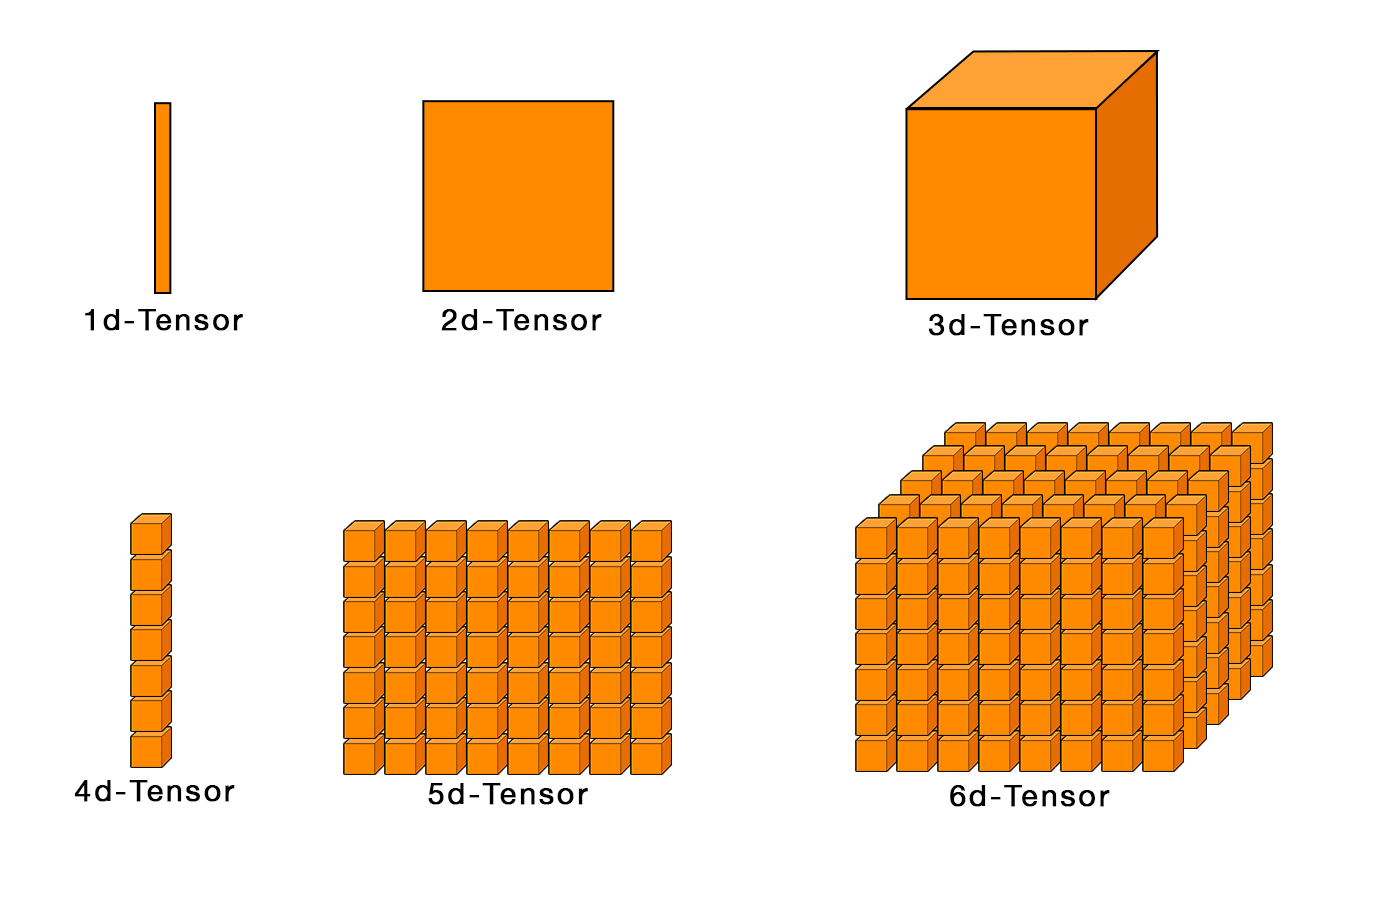

In [10]:
Image('./diagram5g.png', width=800)

### MNIST Image Tensor X_train



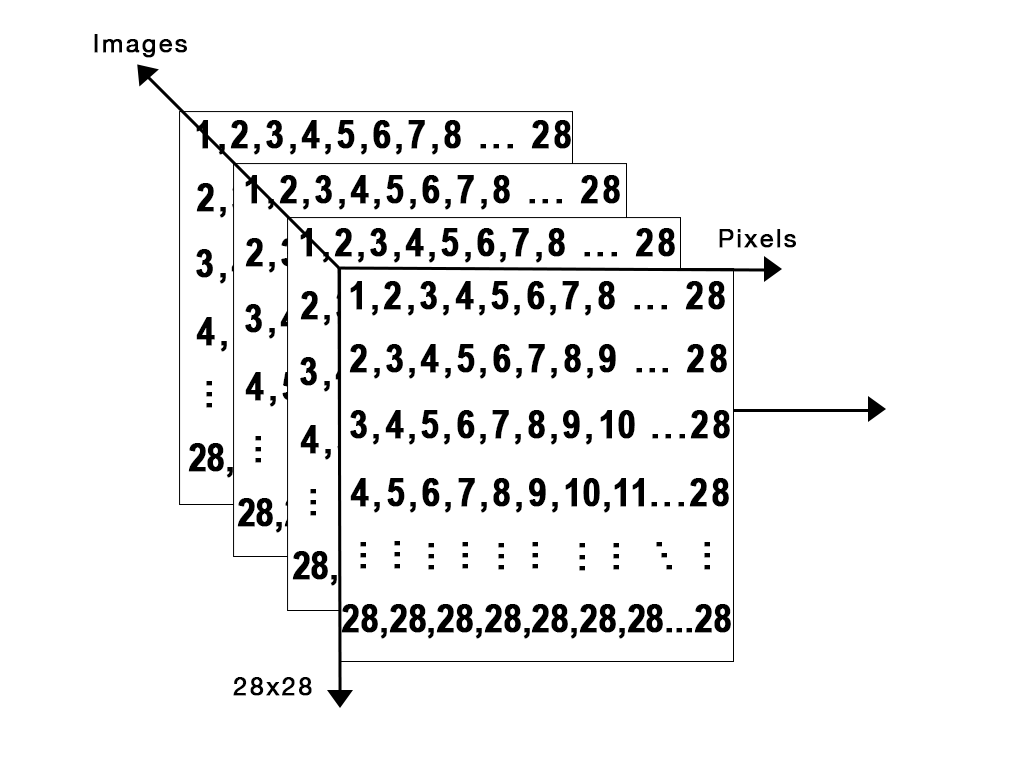

In [11]:
Image('./diagram4f.png', width=550)

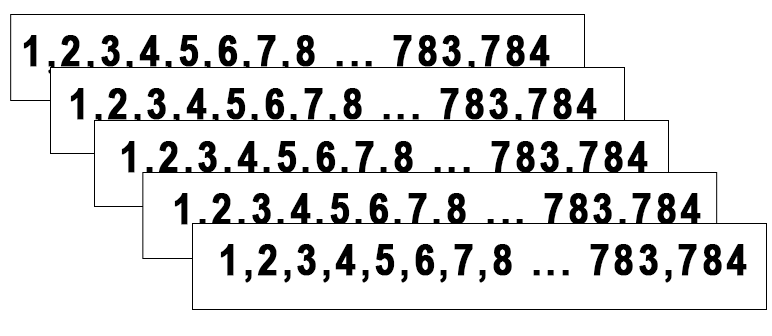

In [12]:
Image('./diagram6d.png', width=550)

## Preparing the data for a basic network

In [13]:
# changing the shape of our data to be flat vectors instead of matrices
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

#Converting the ints to float for floating point math
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Standardizing the data to be between 0-1 --- Be careful to only do this once
x_train /= 255
x_test /= 255


print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


In [14]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
y_train[0]

5

### Making One Hot Encoded vectors

In [16]:
n_classes = 10

# Convert Class Scalars to  One Hot Encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
# lets check our tensor shape
y_train.shape

(60000, 10)

## Plotting some examples

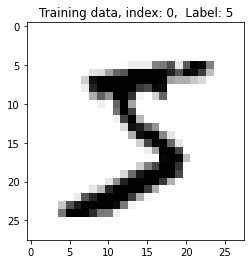

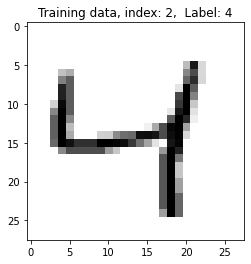

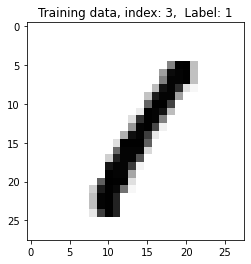

In [19]:
# Method for displaying the number as a picture

def show_digit(index):
    label = y_train[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = x_train[index].reshape([28,28])
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
def show_predicted_digit(image, pred, label):
    # Reshape 784 array into 28x28 image
    image = image.reshape([28,28])
    plt.title('Original Image, Pred: %d,  True Label: %d' %(pred, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
show_digit(0)
show_digit(2)
show_digit(3)

### Setting up our Network Hyper Parameters

In [20]:
# Training Parameters for basic MNIST
learning_rate = 0.001 # controls how much to change the model in response to the estimated error each time the model weights are updated
training_epochs = 10 # number of epochs is the number of complete passes through the training dataset
batch_size = 100 # How many pictures to look at at one time, normally determined by how good your GPU is

# Network Parameters
n_input = 784 ## MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 =  384 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_classes = 10 # MNIST classes for prediction(digits 0-9 )

## Lets build our first sequential network

We start out by defining our model as a sequential one  

Then we add 2 Dense layers  
In each Dense layer we have to define the number of hidden units/neurons for that layer  
We can also add a name to each layer so that we can see it easily in our summary and later in Tensorboard


In [21]:
model = Sequential(name='basic_model_01')
model.add(Dense(n_hidden_1,  input_shape=(n_input,),activation='relu', name = "Dense_1"))
model.add(Dense(n_hidden_2, activation='relu', name = "Dense_2"))
model.add(Dense(n_classes, activation='softmax', name = "Output"))


In [22]:
model.summary()

Model: "basic_model_01"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 384)               301440    
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               38500     
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 340,950
Trainable params: 340,950
Non-trainable params: 0
_________________________________________________________________


### Lets calculate the the parameters

layer 1 = (384 units * 784 weights) + (384 units * 1 bias)  = 301,440  

layer 2 = (100 units * 384 weights) + (100 units * 1 bias)  = 38,500  

layer 3 = (10 units * 100) +(10 units * bias)



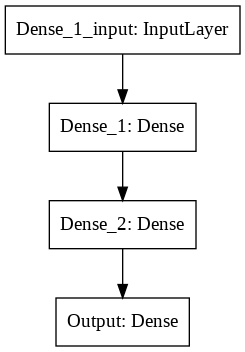

In [23]:
plot_model(model, to_file="first_model.png")

## Create the optimizer and compile the graph

In [24]:
opt = SGD(lr=learning_rate)

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

## Training time

we fit the model using the data we pass in to it 

AKA training the model

In [26]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
# val_accuracy refers to validation set

Epoch 1/10
600/600 [==============================] - 5s 3ms/step - loss: 2.1604 - accuracy: 0.2978 - val_loss: 1.7942 - val_accuracy: 0.6033
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 1.6891 - accuracy: 0.6374 - val_loss: 1.3565 - val_accuracy: 0.7199
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 1.2864 - accuracy: 0.7300 - val_loss: 1.0352 - val_accuracy: 0.7781
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.9980 - accuracy: 0.7835 - val_loss: 0.8323 - val_accuracy: 0.8190
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.8171 - accuracy: 0.8174 - val_loss: 0.7053 - val_accuracy: 0.8356
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.7026 - accuracy: 0.8370 - val_loss: 0.6206 - val_accuracy: 0.8522
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.6235 - accuracy: 0.8514 - val_loss: 0.5608 - val_accuracy: 0.8636
Epoch 

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.45646902918815613
Test accuracy: 0.8812999725341797


In [28]:
history.history

{'accuracy': [0.4131166636943817,
  0.6669333577156067,
  0.7467666864395142,
  0.7933833599090576,
  0.8218333125114441,
  0.8395666480064392,
  0.8518333435058594,
  0.8611500263214111,
  0.8681333065032959,
  0.8733333349227905],
 'loss': [2.0393729209899902,
  1.5822912454605103,
  1.2042722702026367,
  0.9479427337646484,
  0.7877020239830017,
  0.6841188669204712,
  0.612938642501831,
  0.561302125453949,
  0.5222085118293762,
  0.49161264300346375],
 'val_accuracy': [0.6032999753952026,
  0.7199000120162964,
  0.7781000137329102,
  0.8190000057220459,
  0.8356000185012817,
  0.8521999716758728,
  0.8636000156402588,
  0.8704000115394592,
  0.8773000240325928,
  0.8812999725341797],
 'val_loss': [1.7942107915878296,
  1.3565055131912231,
  1.0351911783218384,
  0.832297146320343,
  0.7053037881851196,
  0.6206223368644714,
  0.5608457326889038,
  0.5172286033630371,
  0.4829559624195099,
  0.45646899938583374]}

## We can train more


In [29]:
model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Epoch 1/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4670 - accuracy: 0.8784 - val_loss: 0.4346 - val_accuracy: 0.8864
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4466 - accuracy: 0.8821 - val_loss: 0.4166 - val_accuracy: 0.8899
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4296 - accuracy: 0.8853 - val_loss: 0.4015 - val_accuracy: 0.8927
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4151 - accuracy: 0.8882 - val_loss: 0.3882 - val_accuracy: 0.8956
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4024 - accuracy: 0.8910 - val_loss: 0.3772 - val_accuracy: 0.8980
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.3913 - accuracy: 0.8937 - val_loss: 0.3671 - val_accuracy: 0.8987
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.3815 - accuracy: 0.8955 - val_loss: 0.3583 - val_accuracy: 0.9019
Epoch 

## Now your turn

I want you to build a Sequential model 

In [30]:
# Network Parameters
n_input =  784# MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 100 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_hidden_3 = 100 # 3rd layer number of neurons
n_hidden_4 = 100 # 4th layer number of neurons
n_classes =  10# MNIST classes for prediction(digits 0-9 )

In [31]:
# Build your model here
model = Sequential(name='my_basic_model_01')
model.add(Dense(n_hidden_1,  input_shape=(n_input,),activation='relu', name = "Dense_1"))
model.add(Dense(n_hidden_2, activation='relu', name = "Dense_2"))
model.add(Dense(n_hidden_3, activation='relu', name = "Dense_3"))
model.add(Dense(n_hidden_4, activation='relu', name = "Dense_4"))
model.add(Dense(n_classes, activation='softmax', name = "Output"))

model2 = Sequential(name='my_basic_model_02')
model2.add(Dense(n_hidden_1*2,  input_shape=(n_input,),activation='relu', name = "Dense_1"))
model2.add(Dense(n_hidden_2*2, activation='relu', name = "Dense_2"))
model2.add(Dense(n_classes, activation='softmax', name = "Output"))

In [32]:
# Training Parameters for basic MNIST
learning_rate = 0.1 
training_epochs = 5
batch_size = 100

In [33]:
#test to see that it worked
model.summary()

Model: "my_basic_model_01"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
Dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
Dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 109,810
Trainable params: 109,810
Non-trainable params: 0
_________________________________________________________________


In [34]:
opt = SGD(lr=learning_rate)

In [35]:
#now compile your model
model.compile(loss='categorical_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

In [36]:
#now compile your model
model2.compile(loss='categorical_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

In [37]:
# now train/fit your model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.8775 - accuracy: 0.7174 - val_loss: 0.2052 - val_accuracy: 0.9382
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1848 - accuracy: 0.9443 - val_loss: 0.1429 - val_accuracy: 0.9540
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1252 - accuracy: 0.9617 - val_loss: 0.1274 - val_accuracy: 0.9595
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0967 - accuracy: 0.9709 - val_loss: 0.0944 - val_accuracy: 0.9706
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9763 - val_loss: 0.0977 - val_accuracy: 0.9694
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0647 - accuracy: 0.9801 - val_loss: 0.0849 - val_accuracy: 0.9727
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0530 - accuracy: 0.9835 - val_loss: 0.0913 - val_accuracy: 0.9702
Epoch 

In [38]:
# now train/fit your model
history = model2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
600/600 [==============================] - 2s 2ms/step - loss: 0.6578 - accuracy: 0.8177 - val_loss: 0.2171 - val_accuracy: 0.9377
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1941 - accuracy: 0.9443 - val_loss: 0.1451 - val_accuracy: 0.9583
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1360 - accuracy: 0.9596 - val_loss: 0.1170 - val_accuracy: 0.9647
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1084 - accuracy: 0.9686 - val_loss: 0.1071 - val_accuracy: 0.9678
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0855 - accuracy: 0.9750 - val_loss: 0.0930 - val_accuracy: 0.9716
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0702 - accuracy: 0.9791 - val_loss: 0.0882 - val_accuracy: 0.9717
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0599 - accuracy: 0.9827 - val_loss: 0.0869 - val_accuracy: 0.9720
Epoch 

In [39]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08612939715385437
Test accuracy: 0.9785000085830688


In [40]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0670100674033165
Test accuracy: 0.9793999791145325
